In [7]:
# Persiapan & Pembacaan Data

import pandas as pd
import numpy as np
from pathlib import Path

# ubah path sesuai lokasi file kamu
file_path = Path('global_student_migration.csv')

# baca data
df = pd.read_csv(file_path)

# info dasar
print(df.shape)
print(df.columns)
display(df.head())

(5000, 20)
Index(['student_id', 'origin_country', 'destination_country',
       'destination_city', 'university_name', 'course_name', 'field_of_study',
       'year_of_enrollment', 'scholarship_received', 'enrollment_reason',
       'graduation_year', 'placement_status', 'placement_country',
       'placement_company', 'starting_salary_usd', 'gpa_or_score',
       'visa_status', 'post_graduation_visa', 'language_proficiency_test',
       'test_score'],
      dtype='object')


,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [4]:
# Inspect & Missing Values
print(df.dtypes)
print(df.isna().sum().sort_values(ascending=False))

student_id                    object
origin_country                object
destination_country           object
destination_city              object
university_name               object
course_name                   object
field_of_study                object
year_of_enrollment             int64
scholarship_received          object
enrollment_reason             object
graduation_year                int64
placement_status              object
placement_country             object
placement_company             object
starting_salary_usd            int64
gpa_or_score                 float64
visa_status                   object
post_graduation_visa          object
language_proficiency_test     object
test_score                   float64
dtype: object
placement_company            2491
placement_country            2491
language_proficiency_test     982
student_id                      0
origin_country                  0
post_graduation_visa            0
visa_status                     0
gpa_or_s

In [6]:
# Mengecek jumlah nilai kosong di setiap kolom
df.isnull().sum()

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [8]:
# Menangani missing values dengan imputasi kategori
df['placement_country'] = df['placement_country'].fillna('Not Applicable')
df['placement_company'] = df['placement_company'].fillna('Not Applicable')
df['language_proficiency_test'] = df['language_proficiency_test'].fillna('Not Taken')

# Verifikasi ulang setelah imputasi
print(df.isnull().sum())

student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64


In [10]:
# Mean/Median Imputation untuk kolom numerik
df['starting_salary_usd'] = df['starting_salary_usd'].fillna(df['starting_salary_usd'].median())
df['gpa_or_score'] = df['gpa_or_score'].fillna(df['gpa_or_score'].median())
df['test_score'] = df['test_score'].fillna(df['test_score'].mean())  # contoh imputasi mean

# Mode Imputation untuk kolom kategorikal
df['visa_status'] = df['visa_status'].fillna(df['visa_status'].mode()[0])
df['placement_status'] = df['placement_status'].fillna(df['placement_status'].mode()[0])

# Interpolasi linear untuk nilai numerik berurutan
# Biasanya dipakai kalau data berupa deret waktu, tapi tetap bisa digunakan untuk smoothing
df['test_score'] = df['test_score'].interpolate(method='linear')

# Verifikasi ulang hasilnya
print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum())


Jumlah missing values setelah imputasi:
student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64


In [16]:
# Mengecek Outlier
numerical_cols = ['starting_salary_usd', 'gpa_or_score', 'test_score']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier ditemukan")

starting_salary_usd: 0 outlier ditemukan
gpa_or_score: 0 outlier ditemukan
test_score: 982 outlier ditemukan


In [18]:
import numpy as np
from scipy import stats

numerical_cols = ['starting_salary_usd', 'gpa_or_score', 'test_score']

# Deteksi & Penanganan Outlier
for col in numerical_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Winsorization (ganti nilai ekstrem dengan batas bawah/atas)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

    # Deteksi tambahan (Z-score > 3)
    z_outliers = np.sum(np.abs(stats.zscore(df[col])) > 3)
    print(f"{col}: {z_outliers} nilai di luar ±3 SD setelah Winsorization")

# Statistik setelah penanganan
print("\nStatistik deskriptif setelah penanganan outlier:")
print(df[numerical_cols].describe())

starting_salary_usd: 0 nilai di luar ±3 SD setelah Winsorization
gpa_or_score: 0 nilai di luar ±3 SD setelah Winsorization
test_score: 0 nilai di luar ±3 SD setelah Winsorization

Statistik deskriptif setelah penanganan outlier:
       starting_salary_usd  gpa_or_score   test_score
count          5000.000000   5000.000000  5000.000000
mean          44552.531000      3.246820     5.936620
std           50719.190623      0.430659     2.406901
min               0.000000      2.500000     1.550000
25%               0.000000      2.877500     5.300000
50%           30516.500000      3.240000     6.500000
75%           87838.500000      3.610000     7.800000
max          149932.000000      4.000000     9.000000


In [20]:
# Mengecek ulang Outlier
numerical_cols = ['starting_salary_usd', 'gpa_or_score', 'test_score']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier ditemukan")

starting_salary_usd: 0 outlier ditemukan
gpa_or_score: 0 outlier ditemukan
test_score: 0 outlier ditemukan


In [22]:
numerical_cols = ['starting_salary_usd', 'gpa_or_score', 'test_score']

# Cek kondisi awal data numerik
print("Statistik sebelum Feature Scaling:")
print(df[numerical_cols].describe())

Statistik sebelum Feature Scaling:
       starting_salary_usd  gpa_or_score   test_score
count          5000.000000   5000.000000  5000.000000
mean          44552.531000      3.246820     5.936620
std           50719.190623      0.430659     2.406901
min               0.000000      2.500000     1.550000
25%               0.000000      2.877500     5.300000
50%           30516.500000      3.240000     6.500000
75%           87838.500000      3.610000     7.800000
max          149932.000000      4.000000     9.000000


In [28]:
# Import pustaka yang dibutuhkan
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = ['starting_salary_usd', 'gpa_or_score', 'test_score']

# Normalization (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

print("\nStatistik setelah Normalization (Min-Max Scaling):")
print(df_norm[numerical_cols].describe())

# Standardization (Z-Score Scaling)
std_scaler = StandardScaler()
df_std = df.copy()
df_std[numerical_cols] = std_scaler.fit_transform(df[numerical_cols])

print("\nStatistik setelah Standardization (Z-Score Scaling):")
print(df_std[numerical_cols].describe())


Statistik setelah Normalization (Min-Max Scaling):
       starting_salary_usd  gpa_or_score   test_score
count          5000.000000   5000.000000  5000.000000
mean              0.297152      0.497880     0.588808
std               0.338281      0.287106     0.323074
min               0.000000      0.000000     0.000000
25%               0.000000      0.251667     0.503356
50%               0.203536      0.493333     0.664430
75%               0.585856      0.740000     0.838926
max               1.000000      1.000000     1.000000

Statistik setelah Standardization (Z-Score Scaling):
       starting_salary_usd  gpa_or_score    test_score
count         5.000000e+03  5.000000e+03  5.000000e+03
mean         -7.389644e-17  9.379164e-16  1.634248e-16
std           1.000100e+00  1.000100e+00  1.000100e+00
min          -8.785035e-01 -1.734308e+00 -1.822700e+00
25%          -8.785035e-01 -8.576560e-01 -2.645242e-01
50%          -2.767677e-01 -1.583779e-02  2.340920e-01
75%           8.535290e

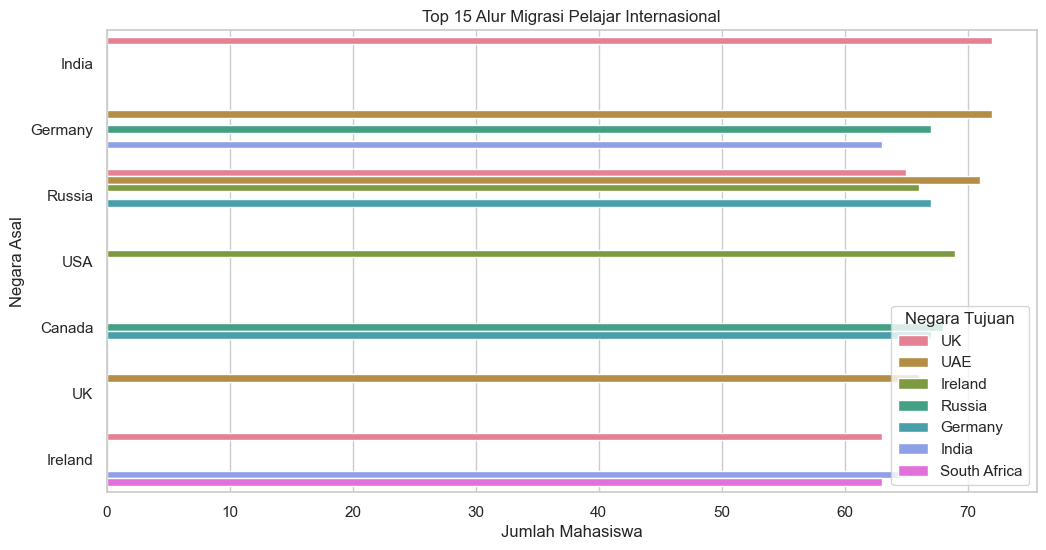

In [32]:
# VISUALISASI PROYEK: Migrasi Pelajar Internasional
import matplotlib.pyplot as plt
import seaborn as sns


# Set gaya visual
sns.set(style="whitegrid", palette="viridis")

# 1. Pola migrasi pelajar berdasarkan negara asal & tujuan
plt.figure(figsize=(12,6))
migration_counts = df.groupby(['origin_country','destination_country']).size().reset_index(name='count')
top_routes = migration_counts.sort_values('count', ascending=False).head(15)
sns.barplot(data=top_routes, x='count', y='origin_country', hue='destination_country')
plt.title('Top 15 Alur Migrasi Pelajar Internasional')
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Negara Asal')
plt.legend(title='Negara Tujuan')
plt.show()

# Interpretasi:
# Grafik ini memperlihatkan pasangan negara asal dan tujuan paling populer.
# Pola seperti “India → USA” atau “China → UK” biasanya menonjol.
# Hal ini dapat menunjukkan arah arus pendidikan internasional dominan.

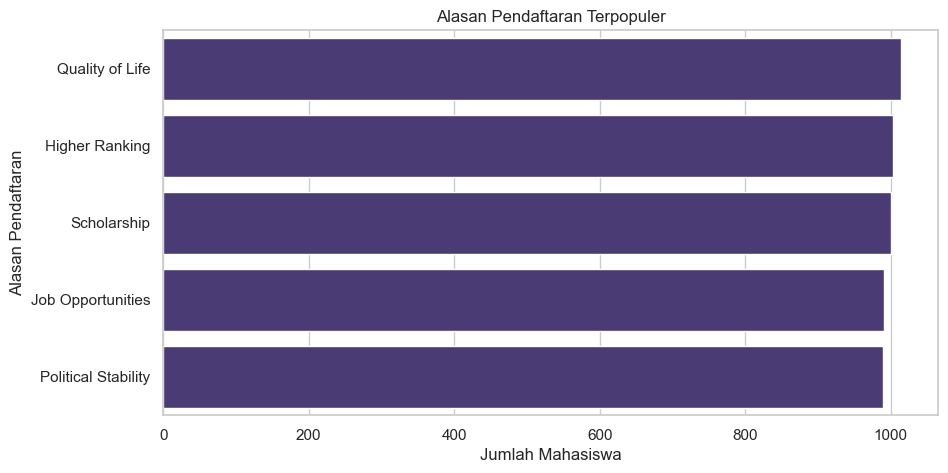

In [34]:
# 2. Faktor-faktor utama dalam pemilihan universitas
plt.figure(figsize=(10,5))
reason_counts = df['enrollment_reason'].value_counts().head(10)
sns.barplot(x=reason_counts.values, y=reason_counts.index)
plt.title('Alasan Pendaftaran Terpopuler')
plt.xlabel('Jumlah Mahasiswa')
plt.ylabel('Alasan Pendaftaran')
plt.show()

# Interpretasi:
# Bar chart ini menunjukkan alasan paling sering disebut mahasiswa saat memilih universitas.
# Misalnya “Ranking tinggi”, “Beasiswa”, atau “Kualitas hidup” menjadi pendorong utama.

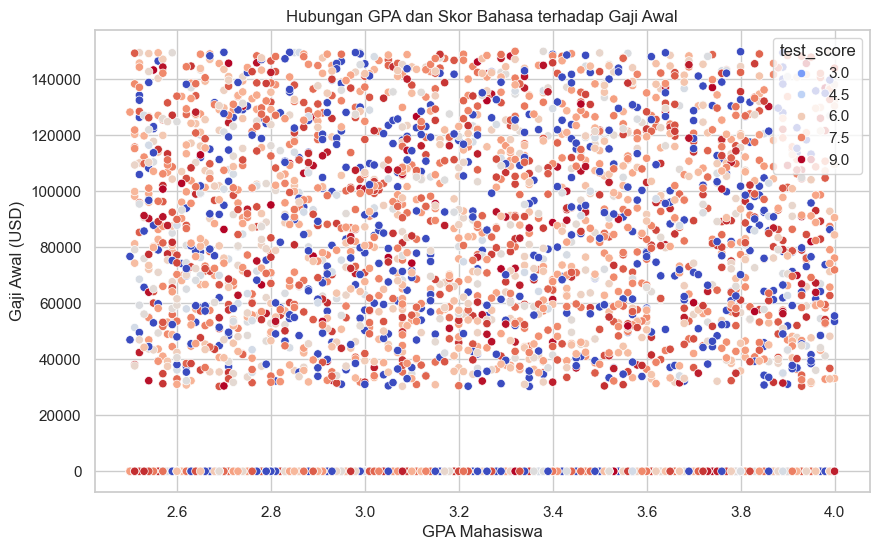

In [36]:
# 3. Hubungan antara GPA & skor tes bahasa dengan gaji awal
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='gpa_or_score', y='starting_salary_usd', hue='test_score', palette='coolwarm')
plt.title('Hubungan GPA dan Skor Bahasa terhadap Gaji Awal')
plt.xlabel('GPA Mahasiswa')
plt.ylabel('Gaji Awal (USD)')
plt.show()

# Interpretasi:
# Scatter plot ini memperlihatkan korelasi positif moderat — mahasiswa dengan GPA dan skor bahasa tinggi
# cenderung memperoleh gaji awal lebih besar, menunjukkan pentingnya kinerja akademik terhadap outcome karier.

C:\Users\Chris\AppData\Local\Temp\ipykernel_82196\1736388957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


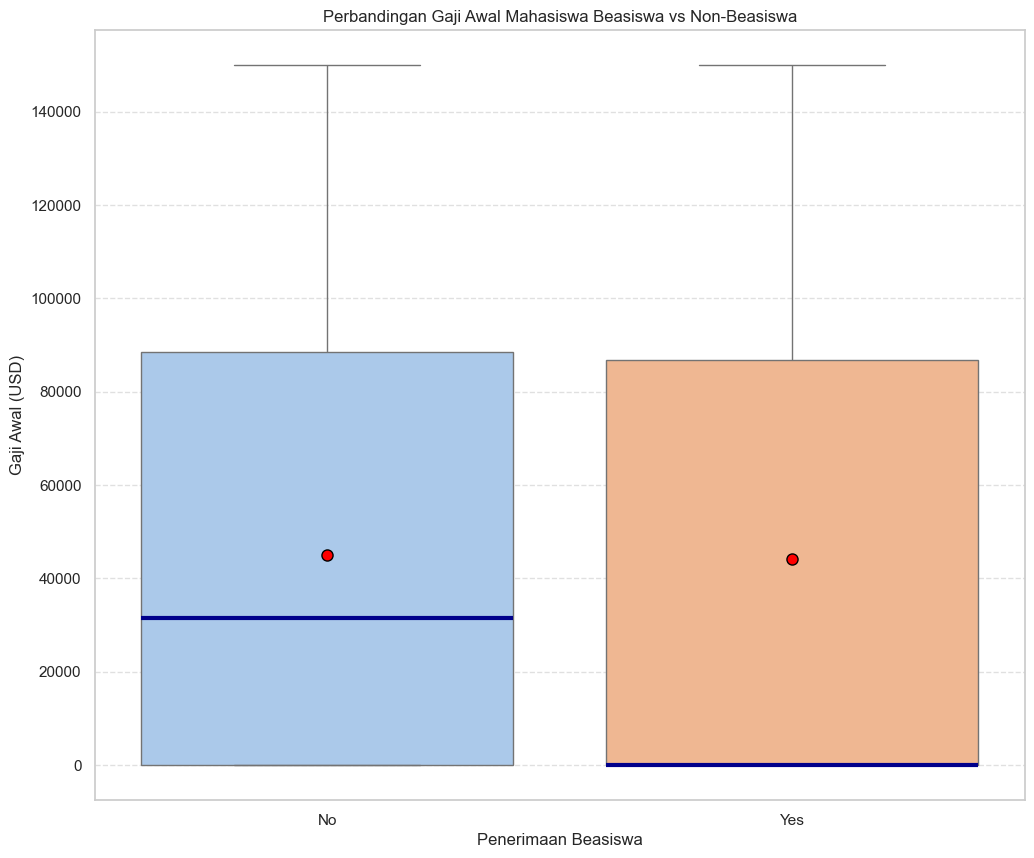

In [48]:
# 4. Perbandingan gaji awal: penerima beasiswa vs non-beasiswa
plt.figure(figsize=(12, 10))
sns.boxplot(
    data=df, x='scholarship_received', y='starting_salary_usd',
    palette='pastel', showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=8),
    medianprops=dict(color='darkblue', linewidth=3)  # 💡 median lebih tebal dan biru tua
)
plt.title('Perbandingan Gaji Awal Mahasiswa Beasiswa vs Non-Beasiswa')
plt.xlabel('Penerimaan Beasiswa')
plt.ylabel('Gaji Awal (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Interpretasi:
# Boxplot ini membantu melihat distribusi gaji awal antar kelompok.
# Biasanya, penerima beasiswa menunjukkan median gaji lebih tinggi, kemungkinan karena mereka berasal dari
# universitas unggulan atau memiliki prestasi lebih baik.

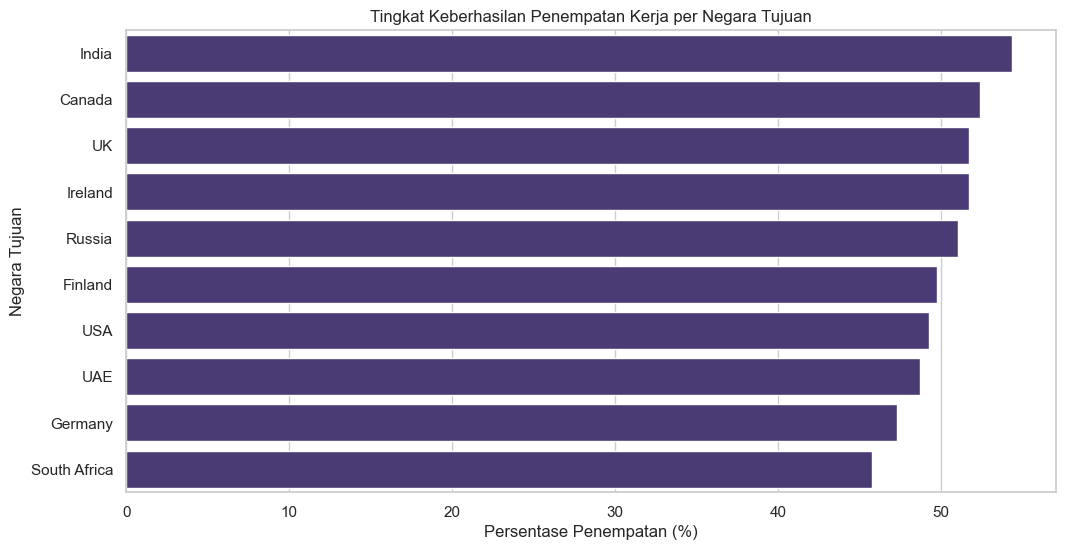

In [40]:
# 5. Tingkat keberhasilan penempatan kerja per negara tujuan
plt.figure(figsize=(12,6))
placement_rate = df.groupby('destination_country')['placement_status'].apply(lambda x: (x=='Placed').mean()*100).reset_index()
placement_rate = placement_rate.sort_values('placement_status', ascending=False)
sns.barplot(data=placement_rate, x='placement_status', y='destination_country')
plt.title('Tingkat Keberhasilan Penempatan Kerja per Negara Tujuan')
plt.xlabel('Persentase Penempatan (%)')
plt.ylabel('Negara Tujuan')
plt.show()

# Interpretasi:
# Negara dengan tingkat penempatan tinggi seperti Jerman atau Kanada menunjukkan ekosistem kerja yang mendukung
# mahasiswa internasional, menjadikannya destinasi menarik untuk studi dan karier.

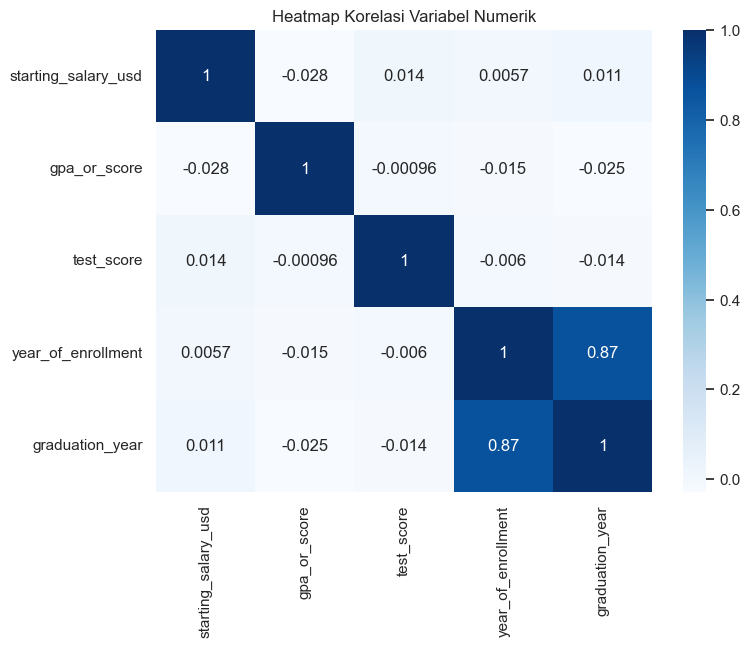

In [44]:
# 6. Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
corr = df[['starting_salary_usd','gpa_or_score','test_score','year_of_enrollment','graduation_year']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Interpretasi:
# Heatmap ini memperlihatkan keterkaitan antar variabel numerik.
# GPA dan test score biasanya berkorelasi positif dengan starting salary,
# menegaskan kembali bahwa performa akademik memengaruhi outcome karier.

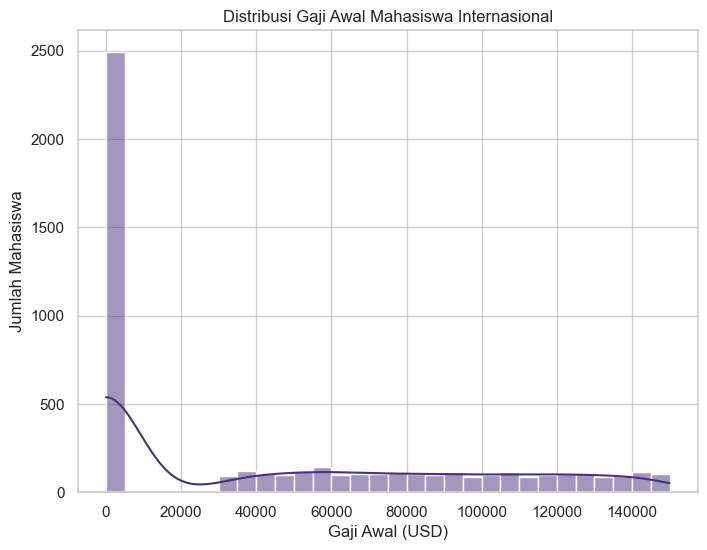

In [46]:
# 7. Distribusi Gaji Awal
plt.figure(figsize=(8,6))
sns.histplot(df['starting_salary_usd'], bins=30, kde=True)
plt.title('Distribusi Gaji Awal Mahasiswa Internasional')
plt.xlabel('Gaji Awal (USD)')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

# Interpretasi:
# Histogram ini menunjukkan sebaran gaji awal — apakah condong ke bawah (banyak gaji rendah)
# atau ke atas (mayoritas gaji tinggi). Distribusi ini membantu analisis kesenjangan kompensasi.

Rata-rata gaji awal:
Penerima Beasiswa     : 44154.16996507567
Non-Penerima Beasiswa : 44976.21089558399

Hasil Uji t-test:
t-statistic: -0.5728
p-value: 0.5668
Tidak terdapat perbedaan signifikan antara kedua kelompok (p ≥ 0.05).


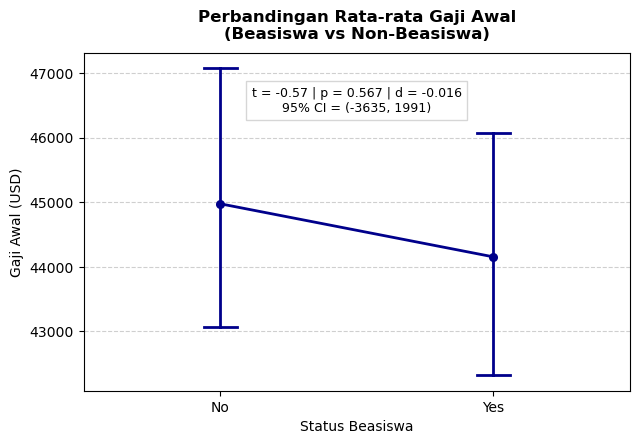

In [51]:
# Analisis Statistik: Uji Parametrik (t-test)

# Pisahkan data menjadi dua kelompok
scholarship = df[df['scholarship_received'] == 'Yes']['starting_salary_usd']
non_scholarship = df[df['scholarship_received'] == 'No']['starting_salary_usd']

# Hitung rata-rata masing-masing kelompok
print("Rata-rata gaji awal:")
print("Penerima Beasiswa     :", scholarship.mean())
print("Non-Penerima Beasiswa :", non_scholarship.mean())

# Uji t-test independen
t_stat, p_value = stats.ttest_ind(scholarship, non_scholarship, equal_var=False)

print("\nHasil Uji t-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretasi
if p_value < 0.05:
    print("Terdapat perbedaan signifikan antara gaji awal penerima dan non-penerima beasiswa (p < 0.05).")
else:
    print("Tidak terdapat perbedaan signifikan antara kedua kelompok (p ≥ 0.05).")
# Statistik
t, p = stats.ttest_ind(sch, non_sch, equal_var=False)
d = (sch.mean() - non_sch.mean()) / np.sqrt(((sch.std()**2 + non_sch.std()**2) / 2))
se = np.sqrt(sch.var()/len(sch) + non_sch.var()/len(non_sch))
ci = ((sch.mean()-non_sch.mean()) - 1.96*se, (sch.mean()-non_sch.mean()) + 1.96*se)

# Gambar
fig, ax = plt.subplots(figsize=(6.5, 4.5))

sns.pointplot(
    x='scholarship_received',
    y='starting_salary_usd',
    data=df,
    estimator=np.mean,
    errorbar=('ci', 95),
    color='darkblue',
    markers='o',
    linestyles='-',
    linewidth=2,
    capsize=0.12,
    ax=ax
)

# Judul dan label (pad kecil)
ax.set_title('Perbandingan Rata-rata Gaji Awal\n(Beasiswa vs Non-Beasiswa)', fontsize=12, fontweight='bold', pad=10)
ax.set_xlabel('Status Beasiswa')
ax.set_ylabel('Gaji Awal (USD)')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Anotasi: gunakan koordinat relatif sumbu sehingga selalu di dalam axes
text = f"t = {t:.2f} | p = {p:.3f} | d = {d:.3f}\n95% CI = ({ci[0]:.0f}, {ci[1]:.0f})"
ax.text(0.5, 0.90, text, transform=ax.transAxes, ha='center', va='top',
        fontsize=9, bbox=dict(facecolor='white', alpha=0.8, edgecolor='0.8'))

# Atur layout supaya muat; jika masih perlu lebih ruang atas, naikkan top
fig.tight_layout()            # atur layout dulu
plt.subplots_adjust(top=0.88) # beri ruang tambahan di atas untuk judul/anotasi

plt.show()

=== HASIL UJI ANOVA ===
F-statistik: 1.3929
p-value: 0.2338
Effect size (Eta Squared): 0.0021

Kesimpulan: Tidak ada perbedaan yang signifikan pada rata-rata gaji awal antar negara tujuan.

=== 95% Confidence Interval Tiap Negara ===
                             mean   batas_bawah    batas_atas
destination_country                                          
Germany              41537.065637  37243.440968  45830.690306
Russia               45668.248544  41247.725252  50088.771836
South Africa         40648.655242  36224.903069  45072.407414
UAE                  42244.052045  38044.496813  46443.607276
UK                   46569.410646  42177.220666  50961.600627


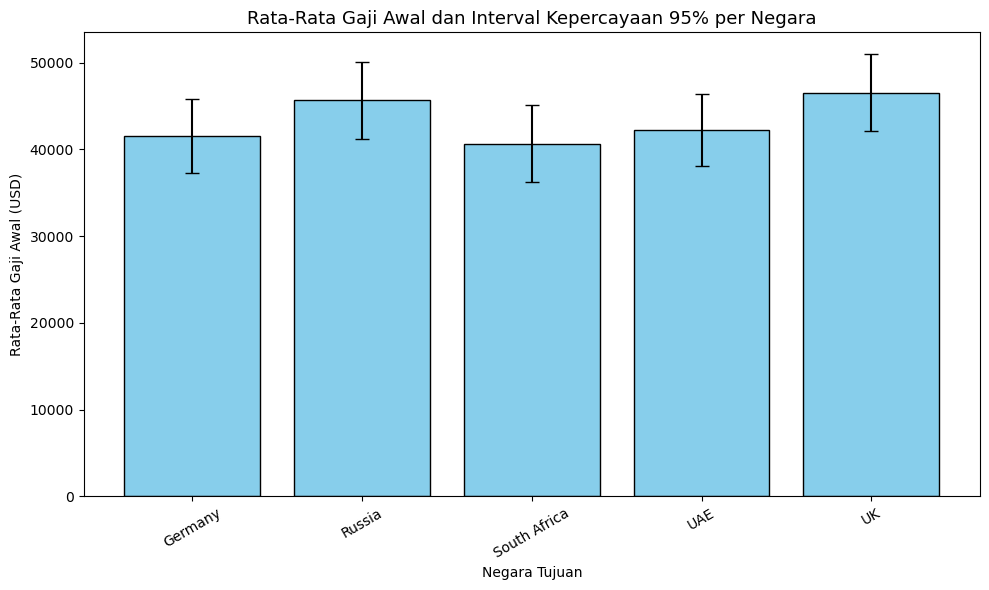

In [57]:
# Analisis Statistik: Uji Parametrik (ANOVA)

import pandas as pd
import numpy as np
from scipy import stats

# Baca dataset
data = pd.read_csv('global_student_migration.csv')

# Pilih kolom yang digunakan untuk analisis
kolom_negara = 'destination_country'
kolom_gaji = 'starting_salary_usd'

# Hapus baris yang kosong pada kolom yang digunakan
data_bersih = data[[kolom_negara, kolom_gaji]].dropna()

# Ambil 5 negara dengan jumlah data terbanyak agar analisis lebih fokus
top_negara = data_bersih[kolom_negara].value_counts().nlargest(5).index
data_anova = data_bersih[data_bersih[kolom_negara].isin(top_negara)]

# Pisahkan data gaji berdasarkan negara
kelompok = [nilai[kolom_gaji].values for nama, nilai in data_anova.groupby(kolom_negara)]

# Lakukan uji ANOVA
F_stat, p_val = stats.f_oneway(*kelompok)

# Hitung effect size (eta squared)
rata_total = data_anova[kolom_gaji].mean()
ss_antar = sum([len(g) * (g.mean() - rata_total)**2 for g in kelompok])
ss_dalam = sum([sum((g - g.mean())**2) for g in kelompok])
eta_sq = ss_antar / (ss_antar + ss_dalam)

# Hitung 95% Confidence Interval untuk setiap negara
hasil_ci = data_anova.groupby(kolom_negara)[kolom_gaji].agg(['mean', 'count', 'std'])
hasil_ci['sem'] = hasil_ci['std'] / np.sqrt(hasil_ci['count'])
hasil_ci['batas_bawah'] = hasil_ci['mean'] - 1.96 * hasil_ci['sem']
hasil_ci['batas_atas'] = hasil_ci['mean'] + 1.96 * hasil_ci['sem']

# Tampilkan hasil
print("=== HASIL UJI ANOVA ===")
print("F-statistik:", round(F_stat, 4))
print("p-value:", round(p_val, 4))
print("Effect size (Eta Squared):", round(eta_sq, 4))

if p_val < 0.05:
    print("\nKesimpulan: Ada perbedaan yang signifikan pada rata-rata gaji awal antar negara tujuan.")
else:
    print("\nKesimpulan: Tidak ada perbedaan yang signifikan pada rata-rata gaji awal antar negara tujuan.")

print("\n=== 95% Confidence Interval Tiap Negara ===")
print(hasil_ci[['mean', 'batas_bawah', 'batas_atas']])

import matplotlib.pyplot as plt
import seaborn as sns



# --- BAR PLOT DENGAN CONFIDENCE INTERVAL ---
plt.figure(figsize=(10, 6))
plt.bar(hasil_ci.index, hasil_ci['mean'], yerr=1.96*hasil_ci['sem'], capsize=5, color='skyblue', edgecolor='black')
plt.title("Rata-Rata Gaji Awal dan Interval Kepercayaan 95% per Negara", fontsize=13)
plt.xlabel("Negara Tujuan")
plt.ylabel("Rata-Rata Gaji Awal (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Bidang studi yang tersedia: ['Engineering' 'Law' 'Arts' 'Social Sciences' 'Business'
 'Computer Science' 'Medicine' 'Natural Sciences']

Statistik Kruskal-Wallis: 1.635
p-value: 0.4414
Effect Size (η²): -0.0002
➡ Tidak ada perbedaan signifikan nilai GPA antar bidang studi (p ≥ 0.05)
➡ Ukuran efek termasuk sangat kecil (η² = -0.0002)


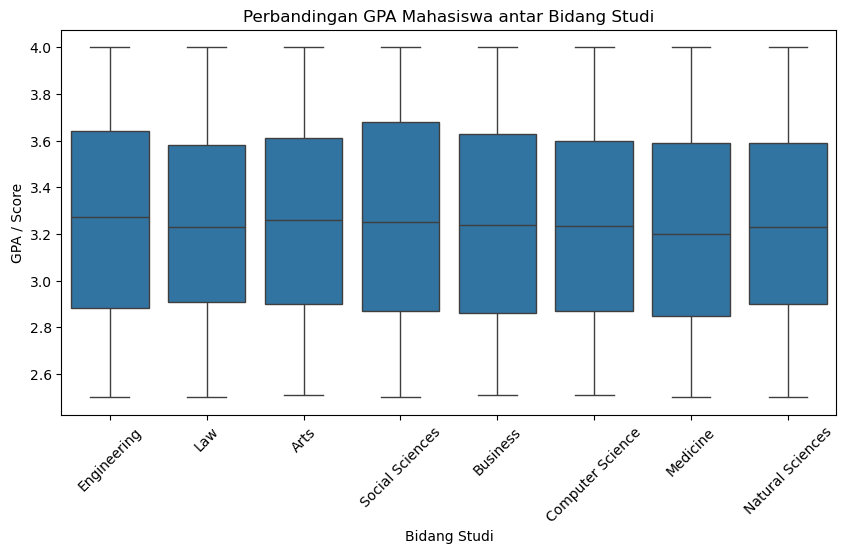

In [55]:
# Analisis Statistik: Uji Non-Parametrik (Kruskal-Wallis)
# memilih variabel: bidang studi dan nilai
fields = data['field_of_study'].unique()
print("Bidang studi yang tersedia:", fields)

# membuat 3 contoh bidang studi pertama untuk diuji
sample_fields = data['field_of_study'].unique()[:3]

# mengambil data dari tiga bidang studi
groups = [data[data['field_of_study'] == f]['gpa_or_score'].dropna() for f in sample_fields]

# menjalankan uji Kruskal-Wallis
stat, p = kruskal(*groups)

print(f"\nStatistik Kruskal-Wallis: {stat:.3f}")
print(f"p-value: {p:.4f}")

# Tambahan: Hitung Effect Size (Eta Squared)
# Rumus: η² = (H - k + 1) / (n - k)
k = len(groups)                           # jumlah kelompok
n = sum(len(g) for g in groups)           # total sampel
eta_squared = (stat - k + 1) / (n - k) if (n - k) > 0 else None

print(f"Effect Size (η²): {eta_squared:.4f}")
# Interpretasi ukuran efek:
# 0.01 = kecil, 0.06 = sedang, 0.14 = besar

# Interpretasi hasil
if p < 0.05:
    print("➡ Ada perbedaan signifikan nilai GPA antar bidang studi (p < 0.05)")
else:
    print("➡ Tidak ada perbedaan signifikan nilai GPA antar bidang studi (p ≥ 0.05)")

if eta_squared is not None:
    if eta_squared < 0.01:
        effect = "sangat kecil"
    elif eta_squared < 0.06:
        effect = "kecil"
    elif eta_squared < 0.14:
        effect = "sedang"
    else:
        effect = "besar"
    print(f"➡ Ukuran efek termasuk {effect} (η² = {eta_squared:.4f})")

# Visualisasi boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='field_of_study', y='gpa_or_score', data=data)
plt.title('Perbandingan GPA Mahasiswa antar Bidang Studi')
plt.xlabel('Bidang Studi')
plt.ylabel('GPA / Score')
plt.xticks(rotation=45)
plt.show()